### Part II - (Prosper Loan Data - borrower rate relationships and Own Home )

#### by (Meshari Althubaiti)

## Investigation Overview

This presentation will examine the link between the borrower rate, loan amount, and employment duration. One of the key aspects I like to illustrate here is the nature of the link between these variables and the characteristic of primary interest (borrower rate). I will discuss the relationship between job status and home ownership.Then I will concentrate on the distribution of the loan period. I will explain shortly how many loans each term has.


## Dataset Overview

The data set used for the investigation and analysis is "Prosper Loan Data." This data relates to loans issued by Prosper Bank. There were 81 features in the dataset that provided information on each loan applicant. There are 1,139,374 applicants with varying employment and loan-related information.

In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
%matplotlib inline
from ipywidgets import interactive

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
pld = pd.read_csv('prosperLoanData.csv')  # pld = prosper Loan Data

#subset data
loans = pld[['ListingNumber', 'BorrowerRate','EmploymentStatus', 'EmploymentStatusDuration', 'StatedMonthlyIncome',
             'IsBorrowerHomeowner', 'ListingCategory (numeric)', 'LoanOriginalAmount',
             'Term', 'MonthlyLoanPayment', 'TotalProsperLoans',
              'LoanStatus']]

In [3]:
# rename columns
loans = loans.rename(columns={ 'ListingNumber': 'Listing_Number', 'BorrowerRate': 'Borrower_Rate' , 
                              'EmploymentStatus': 'Employment_Status',
                               'IsBorrowerHomeowner':'Owning_home', 'EmploymentStatusDuration':'Employment_Status_Duration',
                               'StatedMonthlyIncome':'Stated_Monthly_Income', 'LoanStatus':'Loan_Status',
                               'TotalProsperLoans':'Total_Prosper_Loans', 'ListingCategory (numeric)':'Loan_Reason',
                               'LoanOriginalAmount':'Loan_Original_Amount', 'MonthlyLoanPayment':'Monthly_Loan_Payment'})

In [4]:
# remove unreasonable employment duration
over_500 = loans[loans['Employment_Status_Duration'] > 500].index
loans.drop(over_500 , inplace=True)

In [5]:
# Dividing by 12 months to convert the durations from months to years.
loans['Employment_Status_Duration'] = loans['Employment_Status_Duration']/12

In [6]:
# Convert the number of the reason to the names of reason
loans = loans.replace({'Loan_Reason' :  {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement',
                                         3: 'Business', 4: 'Personal Loan', 5: 'Student Use', 6: 'Auto',
                                         7: 'Other', 8: 'Baby & Adoption', 9: 'Boat', 10: 'Cosmetic Procedure',
                                         11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 
                                         14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle',
                                         17: 'RV',  18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}})

## (Visualization 1)
### Borrower Rate vs. Loan Original Amount & Employment Status Duration

It has been demonstrated that the duration of work has a negligible impact on the loan rate. However, there is a direct correlation between the loan amount and the lending rate. The interest rate falls as the loan amount rises. This is depicted on the left plot by the regression line, which has a negative slope.

In [7]:
loans = loans.reset_index(drop=True) 
# I have taken a random subset of 750 loans to reduce overplotting.
np.random.seed(113707)
sample = np.random.choice(loans.shape[0], 750, replace= False)
loans_sample =  loans.loc[sample]

In [8]:
# There are two outliers in the data sample above that could reduce the readability of the plots later on.
# So I have decided to clear them out to make clean plots.
loans_sample.loc[loans_sample['Loan_Original_Amount']> 27000]

,Listing_Number,Borrower_Rate,Employment_Status,Employment_Status_Duration,Stated_Monthly_Income,Owning_home,Loan_Reason,Loan_Original_Amount,Term,Monthly_Loan_Payment,Total_Prosper_Loans,Loan_Status
48775,925264,0.1485,Employed,8.25,17631.250000,True,Home Improvement,30000,36,1037.76,NaN,Current
68824,1190105,0.1274,Employed,0.25,15416.666667,False,Home Improvement,30000,36,1007.07,NaN,Current


In [9]:
# Get rid of the outliers 
over_27 = loans_sample[loans_sample['Loan_Original_Amount'] > 27000].index
loans_sample.drop(over_27 , inplace=True)

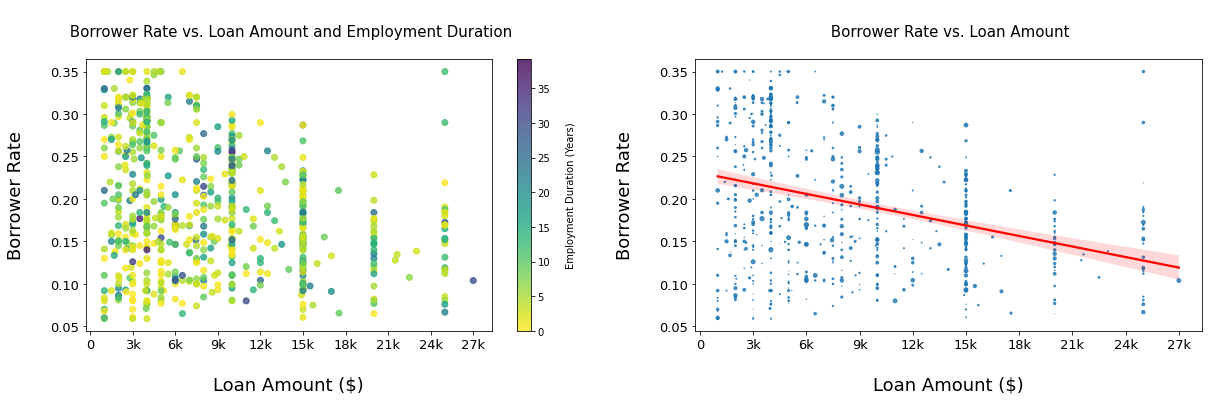

In [10]:
def rate_loan():
    
    # set up fig size
    plt.figure(figsize = [20, 5])

    # plot on left : Borrower Rate vs. Loan Amount and Employment Duration
    # ploting data
    plt.subplot(1, 2, 1)
    plt.scatter(data = loans_sample, x = 'Loan_Original_Amount', y = 'Borrower_Rate',c = 'Employment_Status_Duration', 
            cmap = 'viridis_r', alpha=0.80) 
                                
    # set up x-axis settings
    plt.xlabel('\nLoan Amount ($)', size = 18)
    plt.xticks([0,3e3,6e3,9e3, 1.2e4, 1.5e4, 1.8e4, 2.1e4, 2.4e4, 2.7e4],
           [0, '3k','6k', '9k', '12k', '15k', '18k', '21k', '24k', '27k'], size = 13)

    #set up y-axis setting
    plt.ylabel('Borrower Rate\n', size = 18)
    plt.yticks(size = 13)

    plt.title('\n Borrower Rate vs. Loan Amount and Employment Duration\n', size = 15)
    plt.colorbar(label = '\nEmployment Duration (Years)');

#ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

    # Plot on right: specifically to show the relationship between rate and loan amount (showing the regression)
    plt.subplot(1, 2, 2)
    sb.regplot(data = loans_sample, x = 'Loan_Original_Amount', y = 'Borrower_Rate', x_jitter=0.5, fit_reg=True,
           scatter_kws ={'s':loans_sample['Employment_Status_Duration']/2},line_kws={"color": "red"})

    # set up x-axis settings
    plt.xlabel('\nLoan Amount ($)', size = 18)
    plt.xticks([0,3e3,6e3,9e3, 1.2e4, 1.5e4, 1.8e4, 2.1e4, 2.4e4, 2.7e4],
           [0, '3k','6k', '9k', '12k', '15k', '18k', '21k', '24k', '27k'], size = 13)

    #set up y-axis setting
    plt.ylabel('Borrower Rate\n', size = 18)
    plt.yticks(size = 13)

    plt.title('\n Borrower Rate vs. Loan Amount\n', size = 15);

    plt.show()
    
rate_loan()

## (Visualization 2)

### Employment Status and Home ownership

Employees have a greater chance of owning a house. All the other categories suggest that they do not own a home, most likely due to the fact that they do not have stable employment. However, this may cause Prosper to reconsider approving loans in order to mitigate the risk of making the wrong choice.

In [11]:
# convert job types to "Employed" and "Othere" to "Not available."
loans = loans.replace({'Employment_Status' : {'Full-time': 'Employed', 'Part-time': 'Employed', 'Other':'Not available'}})

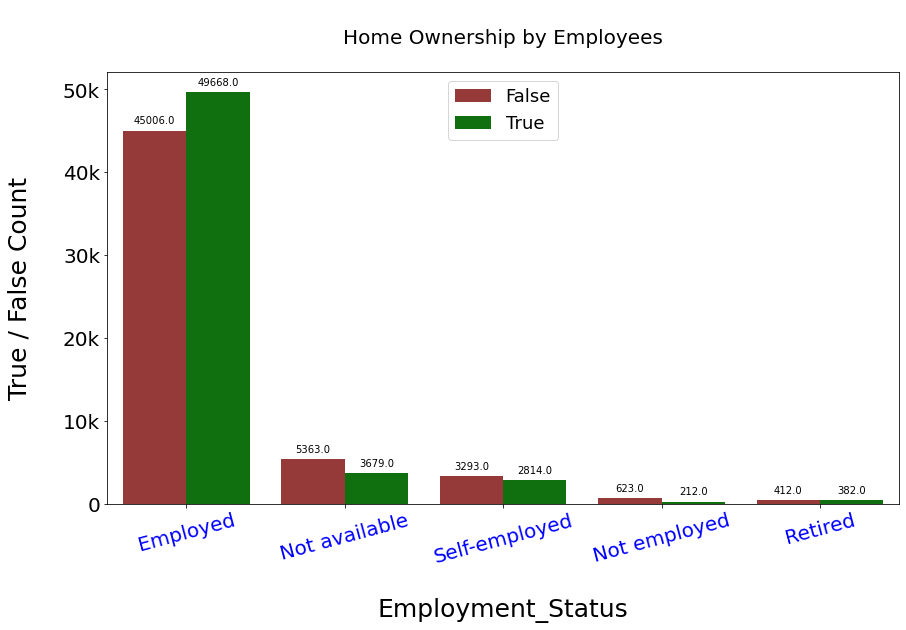

In [12]:
# Set up the figure size and position.
plt.figure(figsize=[20, 15])
plt.subplots_adjust(left=0.10, bottom=0.3, right=0.65, top=0.7, wspace=0.2, hspace=0.2)

# Set up home data to make it in decreasing order
em_counts = loans['Employment_Status'].value_counts() # em = employment
em_index = em_counts.index

#plotting the data
home_countplot = sb.countplot(data = loans, x = 'Employment_Status', hue = 'Owning_home', order = em_index,
                              palette=['brown', 'green'])
                             

# Add annotations to the plot using a for loop.
for home in home_countplot.patches:
    home_countplot.annotate(format(home.get_height(),'.1f'), (home.get_x() + home.get_width() / 2,
                                   home.get_height()), ha = 'center', va = 'center', 
                                   xytext = (0, 10), textcoords = 'offset points')
    
# x-axis settings
plt.xlabel('\nEmployment_Status', size = 25)
plt.xticks(rotation=15, size = 20, color = 'b')

# y-axis settings
plt.ylabel('True / False Count\n', size = 25)
plt.yticks([0, 1e4, 2e4, 3e4, 4e4, 5e4], [0, '10k', '20k', '30k', '40k', '50k'], size = 20)

# Adding legend
plt.legend(fontsize = 18, loc='upper center')

# set up the title
plt.title('\nHome Ownership by Employees\n', size = 20)

# Dsiplay the plot
plt.show();

## (Visualization 3)

### Loan Term 

The average loan period is 36 months. However, the second-most frequent loan duration is 60 months. The smallest proportion of loans have a 12-month duration. 

* 12-month term: 1609
* 36-month term: 87602
* 60-month term: 24496

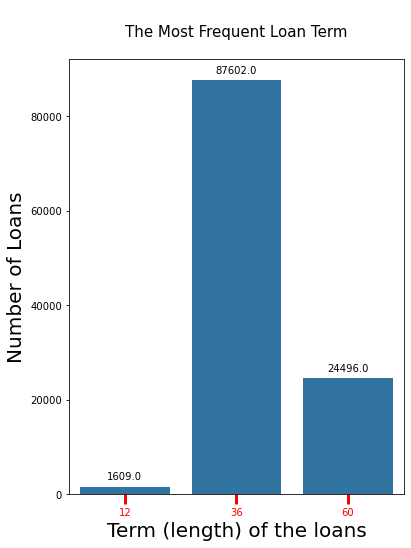

In [13]:
# set the data to be plotted
x = loans['Term'].unique()
y = loans['Term'].value_counts(sort=False)

# set the basic plot
plt.figure(figsize=(6, 8))
blue_color = sb.color_palette()[0]
barplot = sb.barplot(data = loans, x = x , y = y, ci = None, color= blue_color)


# Add annotations to the plot using a for loop.
for p in barplot.patches:
    barplot.annotate(format(p.get_height(),'.1f'), (p.get_x() + p.get_width() / 2.,
                                   p.get_height()), ha = 'center', va = 'center', 
                                   xytext = (0, 10), textcoords = 'offset points')

    
# Labeling the axes
plt.tick_params(axis='x', colors='red', direction='out', length=13, width=3, size = 10)
plt.xlabel('Term (length) of the loans', size = 20)
plt.ylabel('Number of Loans', size = 20)
plt.title('\nThe Most Frequent Loan Term\n', size = 15)

# Dsiplay the plot
plt.show()


In [18]:
#!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt